<a href="https://colab.research.google.com/github/Vzlentin/MNIST_LSTM/blob/main/Mnist_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST avec un RNN LSTM

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

import matplotlib.pyplot as plt

import numpy as np

from termcolor import colored

## Import du dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Mnist: base de données de chiffres écrits à la main

		 2


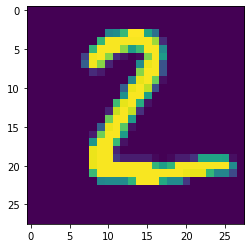

In [ ]:
plt.imshow(x_test[1])
print("\t\t",colored(y_test[1], "blue"))

Les chiffres vont de 0 à 9, les images en x et les valeurs du chiffre en y

In [ ]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


x_train : vecteur de dimension 3

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Ici les données sont normalisées, très important car les réseaux de neurones récurrents sont par essence très sensibles aux différences d'échelle entre les données

La valeur d'un pixel étant comprise entre 0 et 255 en divisant chacun d'entre eux par 255 leurs valeurs seront toutes comprises entre 0 et 1

## Construction du modèle

In [ ]:
def build_model():
  model = Sequential()

  model.add(LSTM(128, input_shape=(28, 28), activation='relu', return_sequences=True))
  model.add(Dropout(0.2))

  model.add(LSTM(128, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(10, activation='softmax'))

  return model

Première couche avec input_shape cohérent avec x_train, c'est à dire que l'on configure le RNN pour qu'il s'attende bien aux données que l'on va lui envoyer

On met return_sequences=True, pour que la deuxième couche LSTM recoive elle aussi en entrée un vecteur de dimension 3, comme x_train

Dropout pour éviter le surentraînage, pendant l'entrainement chaque noeud aura 20% de chance d'être "lâché" hors du réseau

Dernière couche d'une épaisseur de 10 car nous avons 10 classes (10 chiffres)

In [ ]:
opti = tf.keras.optimizers.Adam(learning_rate=1e-3, decay=1e-5)

learning_rate = 0,001 de base, qui va être réduit de la valeur de decay durant l'entrainement à chaque epoch

In [ ]:
model = build_model()
model.compile(loss='sparse_categorical_crossentropy', optimizer=opti, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 136s 2ms/sample - loss: 0.5944 - accuracy: 0.8087 - val_loss: 0.1359 - val_accuracy: 0.9605
Epoch 2/3
60000/60000 [==============================] - 134s 2ms/sample - loss: 0.1589 - accuracy: 0.9588 - val_loss: 0.0823 - val_accuracy: 0.9770
Epoch 3/3
60000/60000 [==============================] - 134s 2ms/sample - loss: 0.1044 - accuracy: 0.9711 - val_loss: 0.0743 - val_accuracy: 0.9789


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 6s - loss: 0.0743 - accuracy: 0.9789


Ici la précision est bonne, contrairement à la première version de ce code ou je n'avais pas normalisé les données obtenant un score de 0.1197

## Prédiction

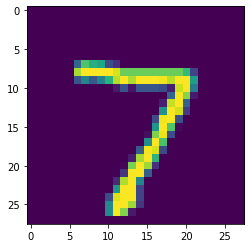

Chiffre reconnu par le RNN: 7


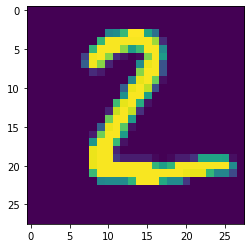

Chiffre reconnu par le RNN: 2


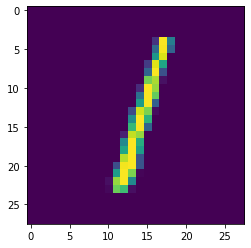

Chiffre reconnu par le RNN: 1


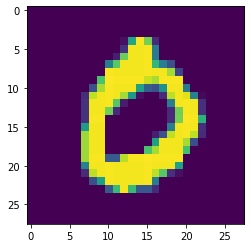

Chiffre reconnu par le RNN: 0


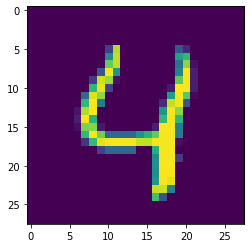

Chiffre reconnu par le RNN: 4


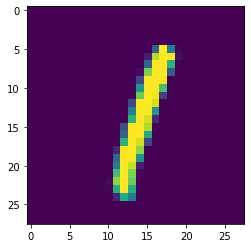

Chiffre reconnu par le RNN: 1


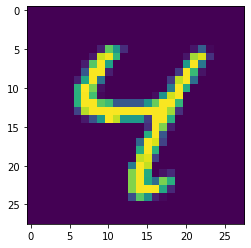

Chiffre reconnu par le RNN: 4


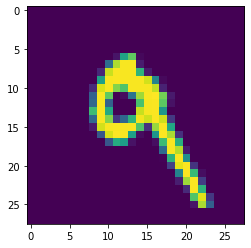

Chiffre reconnu par le RNN: 9


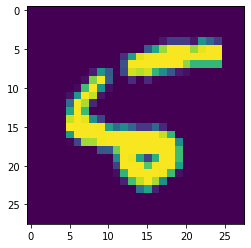

Chiffre reconnu par le RNN: 5


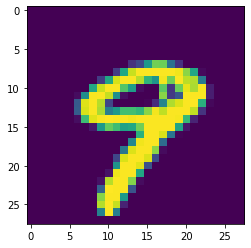

Chiffre reconnu par le RNN: 9


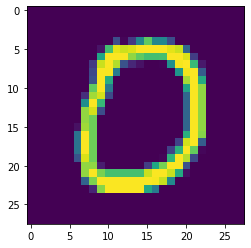

Chiffre reconnu par le RNN: 0


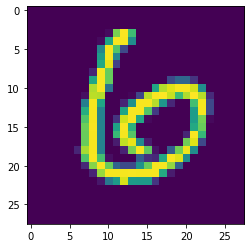

Chiffre reconnu par le RNN: 6


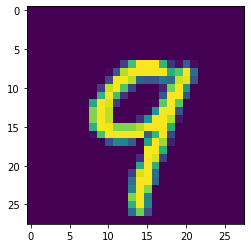

Chiffre reconnu par le RNN: 9


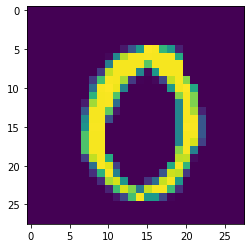

Chiffre reconnu par le RNN: 0


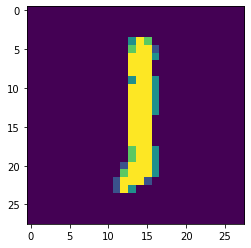

Chiffre reconnu par le RNN: 1


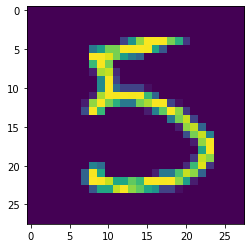

Chiffre reconnu par le RNN: 5


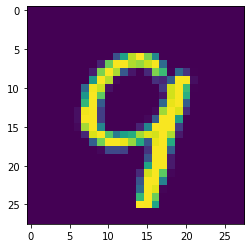

Chiffre reconnu par le RNN: 9


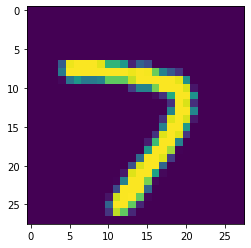

Chiffre reconnu par le RNN: 7


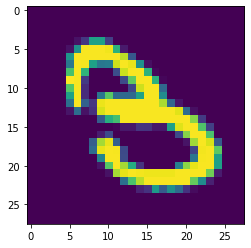

Chiffre reconnu par le RNN: 3


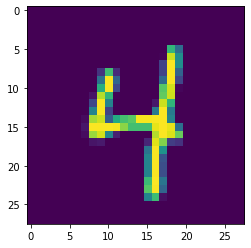

Chiffre reconnu par le RNN: 4


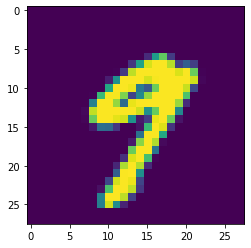

Chiffre reconnu par le RNN: 9


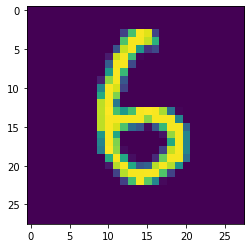

Chiffre reconnu par le RNN: 6


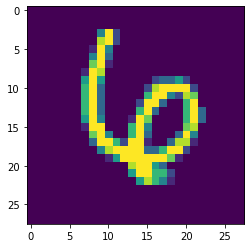

Chiffre reconnu par le RNN: 6


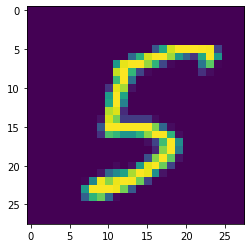

Chiffre reconnu par le RNN: 5


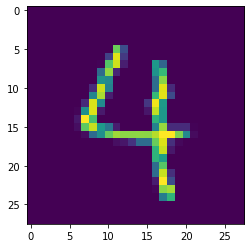

Chiffre reconnu par le RNN: 4


In [ ]:
predictions = model.predict(x_test)

for i in range(25):
  plt.figure()
  plt.imshow(x_test[i])
  plt.grid(False)
  plt.show()
  
  if(np.argmax(predictions[i]) == y_test[[i]]):
    print("Chiffre reconnu par le RNN:",colored(np.argmax(predictions[i]),"blue"))
  else:
    print("Chiffre reconnu par le RNN:",colored(np.argmax(predictions[i]),"red"))